In [4]:
# Importa bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.signal import argrelextrema

In [5]:
# with open('/media/daniela/CEAD-4240/Covid19_mex_esp.csv') as csv_file:
# Se baso en la siguiente pagina web: https://realpython.com/python-csv/
def leer_archivo(nombre):
    xx = np.zeros(80)
    yy = np.zeros(80)
    l3 = np.zeros(80)
    
    with open(nombre) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if row[2]!= '':
                l3[line_count] = row[2] #Conocemos a priori columna correcta
            else:
                l3[line_count] = 0
                
            xx[line_count] = row[0] #Conocemos a priori columna correcta
            yy[line_count] = row[4] #Conocemos a priori columna correcta
                
            line_count += 1

    return [xx, yy, l3]

In [85]:
xx, yy, l3 = leer_archivo('Covid19_mex_esp.csv')

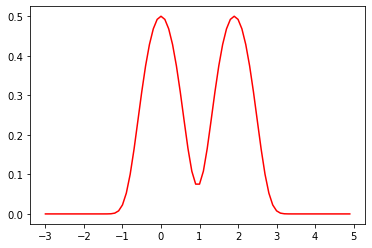

In [126]:
plt.plot(xx, yy, color = "red")
plt.show()

In [125]:

argrelextrema(yy, np.greater)
print(xx[49] - xx[30])

delta_e = (xx[len(xx)-1]-xx[0])/len(xx)
print(delta_e)

1.9
0.09875


In [122]:
xx

array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9])

In [9]:
# Guarda un archivo formato .txt con los valores de xx y yy
name = 'senal_teorica.txt'
fid2 = open(name,"w") #Opens text file in writing mode https://www.tutorialspoint.com/python/python_files_io.htm
for i in range(0, len(xx)): # Cycle for each one of the float elements (numbers) of the neuronal_traces file
    entry = str(xx[i])+" "+str(yy[i])+"\n"
    fid2.write(entry) #Saves the time if we are in the first column
fid2.close()

In [17]:
#Generando un vector con la se;al trasladada 1 vez
def trasladar(ys, n):
    # delta = xs[n]
    tam = len(ys) + n
    y_new = np.zeros(tam)
    
    for i in range( 0, tam ):
        if i < len(ys):
            y_new[i] += ys[i]
        if i >= n:
            y_new[i] += -ys[i-n]
    return y_new    

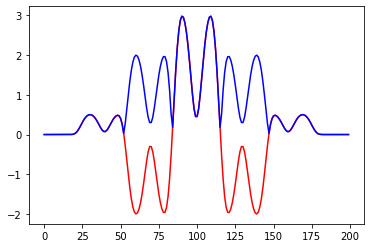

In [38]:
m = 4
n = 30
y_new = yy
for i in range(0, m):
    y_new = trasladar(y_new, n)
    
plt.plot([i for i in range(0, len(y_new))], y_new, color = "red")
plt.plot([i for i in range(0, len(y_new))], abs(y_new), color = "blue")

plt.show()

In [46]:
def aplicar(x, y, m):
    # El tama;o de x tiene que ser del tama;o de y mas m
    #x y y son arreglos
    x_new = np.copy(x)
    for i in range(0, len(y)):
        x_new[m+i] += y[i]
    return x_new

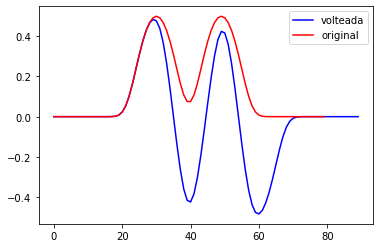

In [76]:
n = 10
y_new = trasladar(yy, n)

plt.plot(y_new, color = "blue", label = "volteada")
plt.plot(yy, color ="red", label = "original")
plt.legend()
plt.show()

In [87]:
def convolucion(yy, n = 40, m = 64): #que n va de 1 hasta 64
    tamano = len(yy)
    ceros = np.zeros(tamano+n*m)
    y_new = trasladar(yy, n)

    for i in range(0, m):
        ceros = aplicar(ceros, (-1)**i*yy, n*i)
    return ceros

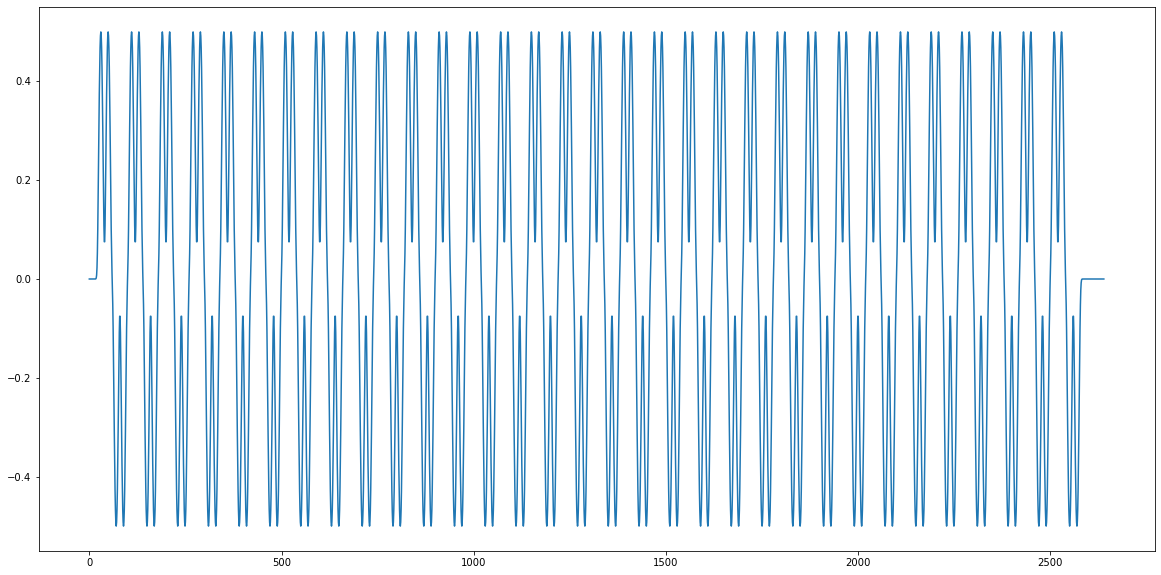

In [93]:
ceros = convolucion(yy)
plt.figure(figsize=(20,10))
plt.plot(ceros)
plt.show()

In [104]:
#Input: yy
def integrar(yy, intervalo = 60, m = 8):
    #intervalo es el maximo valor de las n
    
    integrs = np.zeros(intervalo)
    
    for i in range(1, intervalo):
        y_new = convolucion(yy, i, m)
        integral = sum(abs(y_new))
        integrs[i] = integral
    return integrs

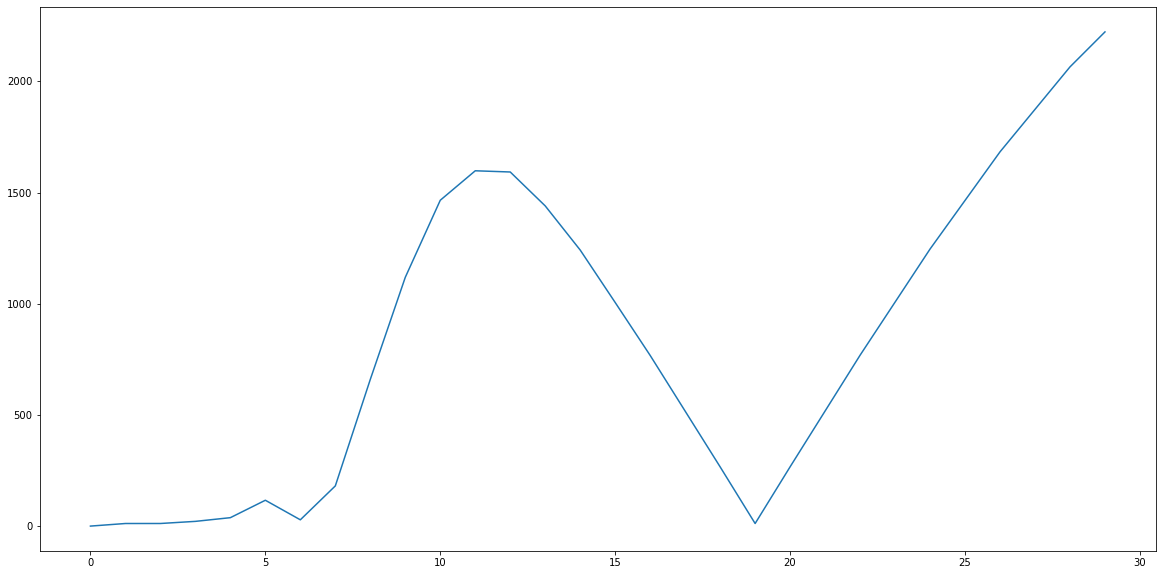

(array([ 6, 19]),)

In [113]:
intervalo = 30
m = 256
integrs = integrar(yy, intervalo, m)

plt.figure(figsize=(20,10))
plt.plot(integrs)
plt.show()

argrelextrema(integrs, np.less)


In [124]:
19*delta_e

1.8762500000000002

In [ ]:
#Generando un vector con la se;al trasladada m veces
def trasladar_mveces(ys, n, m):
    tam = len(ys) + n*m
    y_new = np.zeros(tam)
    
    for traslado_m in range(0, m):
        for i in range( 0, tam ):
            if i < len(ys):
                y_new[i] += ys[i]
            if i >= n:
                y_new[i] += -ys[i-n]
    return y_new    

In [39]:
n = 30
y_new = trasladar(yy, n)
y_super_new = trasladar(y_new, n)

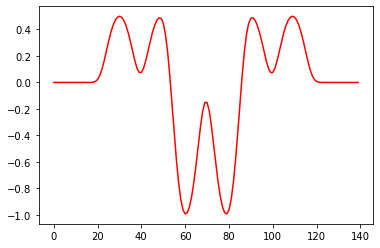

In [41]:
plt.plot([i for i in range(0, len(y_super_new))], y_super_new, color = "red")
# plt.plot([i for i in range(0, len(y_super_new))], abs(y_super_new), color = "blue")

plt.show()

In [12]:
y_new = np.zeros(len(x_new))
for i in range(len(x_new)-n):
    y_new[n+i] = yy[i]

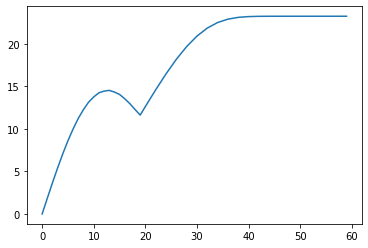

In [33]:
#Input: yy

intervalo = 60
integrs = np.zeros(intervalo)
for i in range(1, intervalo):
    y_new = trasladar(yy, i)
    integral = sum(abs(y_new))
    integrs[i] = integral
#     print("Desfase: "+str(i)+" valor integral: "+str(integral))
plt.plot(integrs)
plt.show()